In [114]:
import pandas as pd
import numpy as np

food_consumption = pd.read_csv('https://assets.datacamp.com/production/repositories/5786/datasets/49f6356966016c70a9f63a0474942675377bdcf2/food_consumption.csv')
food_consumption.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


In [115]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country']=='Belgium']
print(be_consumption)

# Filter for USA
usa_consumption = food_consumption[food_consumption['country']=='USA']
print(usa_consumption.head())

# Calculate mean and median consumption in Belgium
print(be_consumption['consumption'].mean())
print(be_consumption['consumption'].median())

# Calculate mean and median consumption in USA
print(usa_consumption['consumption'].mean())
print(usa_consumption['consumption'].median())

     Unnamed: 0  country food_category  consumption  co2_emission
396         397  Belgium          pork        38.65        136.80
397         398  Belgium       poultry        12.20         13.11
398         399  Belgium          beef        15.63        482.31
399         400  Belgium     lamb_goat         1.32         46.23
400         401  Belgium          fish        18.97         30.29
401         402  Belgium          eggs        12.59         11.57
402         403  Belgium         dairy       236.19        336.43
403         404  Belgium         wheat       111.91         21.34
404         405  Belgium          rice         8.61         11.02
405         406  Belgium      soybeans         0.07          0.03
406         407  Belgium          nuts         7.32         12.96
    Unnamed: 0 country food_category  consumption  co2_emission
55          56     USA          pork        27.64         97.83
56          57     USA       poultry        50.01         53.72
57          58  

In [116]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country']=='Belgium') | (food_consumption['country']=='USA')]
be_and_usa.head(20)


,Unnamed: 0,country,food_category,consumption,co2_emission
55,56,USA,pork,27.64,97.83
56,57,USA,poultry,50.01,53.72
57,58,USA,beef,36.24,1118.29
58,59,USA,lamb_goat,0.43,15.06
59,60,USA,fish,12.35,19.72
60,61,USA,eggs,14.58,13.39
61,62,USA,dairy,254.69,362.78
62,63,USA,wheat,80.43,15.34
63,64,USA,rice,6.88,8.80
64,65,USA,soybeans,0.04,0.02


In [117]:
# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean,np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


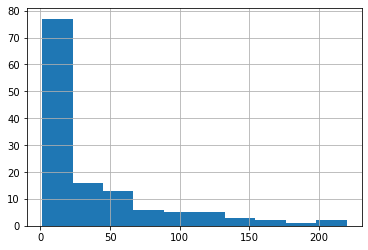

In [118]:
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category']=='rice']
rice_consumption.head()

# Histogram of co2_emission for rice and show plot
rice_consumption['co2_emission'].hist()
plt.show()

In [119]:
# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean,np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


In [120]:
# the measure of central tendency that best summarizes the kilograms of CO2 emissions per person per year for rice is median
# The mean is substantially higher than the median since it’s being pulled up by the high values over 100 kg/person/year.
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],[0,0.25,0.5,0.75,1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [121]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0,1,6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [122]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'],np.linspace(0,1,11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


In [123]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var,np.std]).sort_values(ascending =False,by='var'))


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
lamb_goat      16475.518363  128.356996
pork            3094.963537   55.632396
rice            2281.376243   47.763754
fish             921.637349   30.358481
poultry          245.026801   15.653332
wheat             71.023937    8.427570
nuts              35.639652    5.969895
eggs              21.371819    4.622966
soybeans           0.879882    0.938020


In [124]:
# def calc(a, b):
#     co2_food_consumption = food_consumption[food_consumption['a']=='b']
#     co2_hist =co2_food_consumption['co2_emission'].hist()
#     return co2_hist



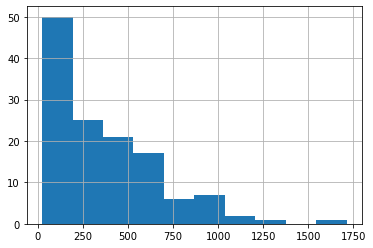

In [125]:
co2_food_consumption = food_consumption[food_consumption['food_category']=='beef']
co2_hist =co2_food_consumption['co2_emission'].hist()



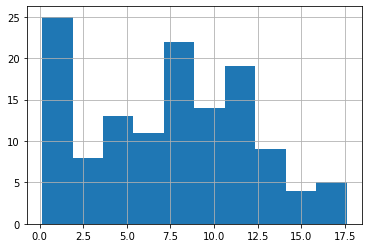

In [126]:
co2_food_consumption = food_consumption[food_consumption['food_category']=='eggs']
co2_hist =co2_food_consumption['co2_emission'].hist()


In [127]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()
emissions_by_country


country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

In [128]:
# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country,0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1
iqr

664.4925000000001

In [129]:
# Calculate the lower and upper cutoffs for outliers
lower = q1 -1.5 * iqr
upper = q3 + 1.5*iqr

In [130]:
print(lower, upper)

-550.0787500000001 2107.89125


In [131]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()
emissions_by_country


country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

In [132]:
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower)|(emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


In [133]:
# edited by cliex159
amir_deals = pd.read_csv('https://assets.datacamp.com/production/repositories/5786/datasets/db3f4e8c9d708fc3b8dfea51d0fdf21d693d2be3/amir_deals.csv')
amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


In [134]:
amir_deals['product'].value_counts()

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64

In [135]:
amir_deals.shape[0]

178

In [136]:
amir_deals['product'].count()==amir_deals.shape[0]

True

In [137]:
0.084 * 100

8.4

In [138]:
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


In [139]:
# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

    Unnamed: 0    product   client status   amount  num_users
69          70  Product J      New   Lost  3182.09          2
91          92  Product A  Current    Won  5121.83          2
92          93  Product A  Current    Won  4509.96         92
25          26  Product C      New    Won  3342.35         16
48          49  Product C  Current   Lost  3727.66         19


In [141]:
restaurant_groups = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTOZd1ME-yR1IzYZdUL1yLnsfd-o5qRRapjClZuuh3z3clXzmu5i7e01CE3mrqgDHZTyJC-chEXc7HN/pub?gid=1180898266&single=true&output=csv')

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)>

In [140]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins = np.linspace(2,6,5))
plt.show()

NameError: name 'restaurant_groups' is not defined

In [ ]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() /restaurant_groups.shape[0]
print(size_dist)

# Reset index and rename columns
size_dist = size_dist.reset_index()
print(size_dist)


In [ ]:
size_dist.columns = ['group_size', 'prob']

print(size_dist)

In [ ]:
expected_value = (size_dist['group_size']*size_dist['prob']).sum()

In [ ]:
expected_value

In [ ]:
prob_4_0 = size_dist[size_dist['group_size']>=4]

In [ ]:
prob_4_1 = np.sum(prob_4_0['prob'])

In [ ]:
prob_4_1

In [ ]:
from scipy.stats import uniform
import matplotlib.pyplot as plt

# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30
    

In [ ]:
# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

In [ ]:
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time)

In [ ]:
prob_greater_than_5

In [ ]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

In [ ]:
np.random.seed(11)
# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0,30,size=1000)

print(wait_times)

In [ ]:
plt.hist(wait_times)
plt.show()

In [ ]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)


In [ ]:
# Simulate a single deal
print(binom.rvs(1, 0.3, size= 1))

In [ ]:
# Simulate 1 week of 3 deals
print(binom.rvs(3,0.3,size=1))

In [ ]:
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size=52)
np.mean(deals)

In [ ]:
prob_3 = binom.pmf(3,3,0.3)

print(prob_3)

In [ ]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1,3,0.3)

print(prob_less_than_or_equal_1)

In [ ]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1-binom.cdf(1,3,0.3)

print(prob_greater_than_1)

In [ ]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

In [ ]:
# Histogram of amount with 10 bins and show plot
print(amir_deals.head())
amir_deals['amount'].hist(bins=10)
plt.show()

In [ ]:
print(np.mean(amir_deals['amount']))

In [ ]:
print(np.std(amir_deals['amount']))

In [ ]:
from scipy.stats import norm
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500,5000,2000)

print(prob_less_7500)

In [ ]:
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000,5000,2000)

print(prob_over_1000)

In [ ]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000,5000,2000)-norm.cdf(3000,5000,2000)

print(prob_3000_to_7000)

In [ ]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25,5000,2000)

print(pct_25)

In [ ]:
# Calculate new average amount
new_mean = 1.2 * 5000

# Calculate new standard deviation
new_sd = 1.3 * 2000

# Simulate 36 new sales
new_sales = norm.rvs(new_mean,new_sd,size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

In [ ]:
# Create a histogram of num_users and show
amir_deals['num_users'].hist()
plt.show()

In [ ]:
plt.hist(amir_deals['num_users'])
plt.show()

In [ ]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20,replace=True)

# Take mean of samp_20
print(np.mean(samp_20))

In [ ]:
sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20,replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
print(sample_means)

In [ ]:
samp_100= amir_deals['num_users'].sample(20,replace=True)
print(np.mean(samp_100))

In [ ]:
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

In [ ]:
# edited by cliex159
all_deals.head()

In [ ]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace = True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))

In [ ]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses
prob_5 = poisson.pmf(5,4)

print(prob_5)

In [ ]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of > 10 responses
prob_over_10 = 1-poisson.cdf(10,4)

print(prob_over_10)

In [ ]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

In [ ]:
# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale=2.5))

In [ ]:
# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

In [142]:
# edited by cliex159
world_happiness = pd.read_csv('https://assets.datacamp.com/production/repositories/5786/datasets/c3248c4db9de555010a360aabcb45894d3115bdd/world_happiness.csv')

In [143]:
world_happiness.head()

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


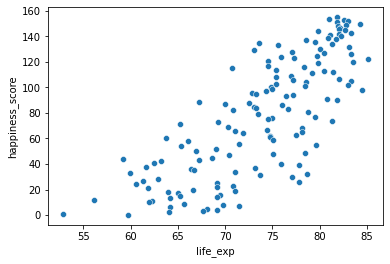

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness)

# Show plot
plt.show()

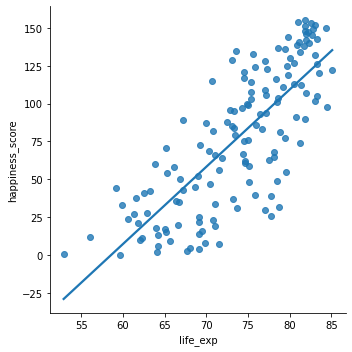

In [145]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)

# Show plot
plt.show()

In [146]:
# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)

0.7802249053272062


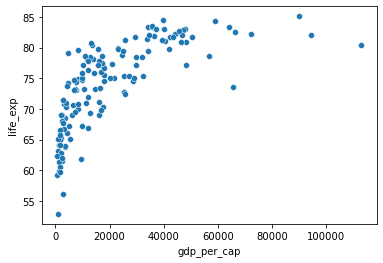

In [147]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x='gdp_per_cap',y='life_exp',data=world_happiness)

# Show plot
plt.show()

In [148]:
# Show plot
plt.show()
  
# Correlation between gdp_per_cap and life_exp
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])

print(cor)

0.7019547642148012


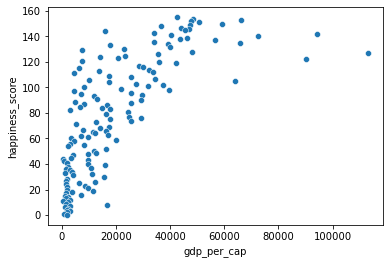

0.727973301222298


In [149]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x ='gdp_per_cap',y = 'happiness_score',data=world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

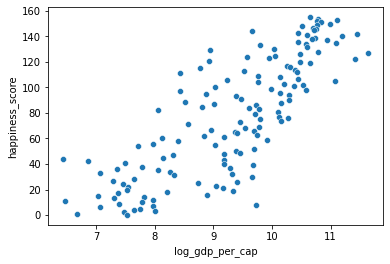

0.8043146004918288


In [150]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])
world_happiness.head()

# Scatterplot of log_gdp_per_cap and happiness_score
sns.scatterplot(x='log_gdp_per_cap',y='happiness_score',data= world_happiness)
plt.show()

# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)

In [152]:
world_happiness.head()

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score,log_gdp_per_cap
0,1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155,10.654904
1,2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154,10.785187
2,3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153,11.101945
3,4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152,10.776871
4,5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151,10.829729


In [ ]:
# Specify c and alpha inside plt.scatter()
plt.scatter(x = gdp_cap, y = life_exp, s = np.array(pop) *2,c=col )

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

# Show the plot
plt.show()

In [ ]:
# Scatter plot
plt.scatter(x = gdp_cap, y = life_exp, s = np.array(pop) * 2, c = col, alpha = 0.8)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

# Additional customizations
plt.text(1550, 71, 'India')
plt.text(5700, 80, 'China')

# Add grid() call
plt.grid(True)

# Show the plot
plt.show()